In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [12]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

In [13]:
outPath = "figures"

In [14]:
pd_table1 = pd.read_csv("Table_2.csv")

/tmp/ipykernel_23002/2670254555.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Model architecture"] = df['Model architecture'].str.split(', ')


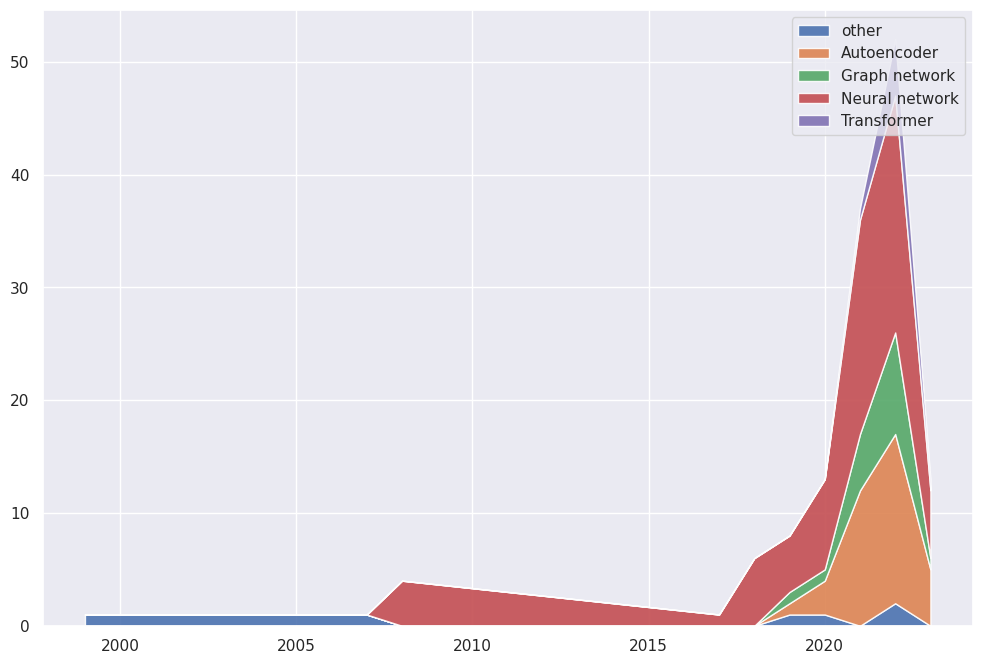

In [31]:
df = pd_table1[["Model architecture", "Year"]]
df["Model architecture"] = df['Model architecture'].str.split(', ')
df = df.explode(["Model architecture"])

''' Coarser '''
df.replace(model_categories, inplace=True)

a = df.value_counts(normalize=False)
a = a.unstack().T
a.replace(np.nan, 0, inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.stackplot(a.index, a["other"], a["Autoencoder"], a["Graph network"], a["Neural network"], a["Transformer"], 
                labels=["other", "Autoencoder", "Graph network", "Neural network", "Transformer"],
                alpha=0.9)
#ax.set_xlim(2019, 2022)
ax.legend()
plt.show()